# 6CS012 - Artificial Intelligence and Machine Learning.
Building Fully Connected Neural Networks for Devnagari

**Handwritten Digit Classification**

In [2]:
import tensorflow as tf
print(tf.keras.__version__)

3.8.0


In [6]:
import numpy as np
import tensorflow as tf
import time
# Create large random matrices
size = (1000, 1000)
A = np.random.rand(*size)
B = np.random.rand(*size)
# NumPy Multiplication
start = time.time()
C_numpy = np.dot(A, B)
print("NumPy Time:", time.time() - start)
# TensorFlow Multiplication (for colab uses GPU Runtime if available)
A_tf = tf.constant(A)
B_tf = tf.constant(B)
start = time.time()
C_tf = tf.matmul(A_tf, B_tf)
print("TensorFlow Time:", time.time() - start)

NumPy Time: 0.11023354530334473
TensorFlow Time: 0.0008432865142822266


# Task 1: Data Preparation
Loading the Data

• Download the provided folder that contains the Devnagari digits dataset.

• Use the Python Imaging Library (PIL) to load and read the image files from the dataset.

• Convert the images into Numpy arrays and normalize them to a range of 0-1.

• use train folder for training and test for testing.

• Extract the corresponding labels for each image.

Hints:

• Ensure that the images are resized to a consistent shape (e.g., 28x28).

• Convert labels to one-hot encoded format for multi-class classification.


In [7]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image # Import Pillow

In [8]:
from tensorflow.keras.utils import to_categorical

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dir = "/content/drive/MyDrive/AI & ML/DevanagariHandwrittenDigitDataset/Train/"
test_dir = "/content/drive/MyDrive/AI & ML/DevanagariHandwrittenDigitDataset/Test/"

img_height, img_width = 28, 28

def load_images_from_folder(folder):
  images = []
  labels = []
  class_names = sorted(os.listdir(folder)) 
  class_map = {name: i for i, name in enumerate(class_names)} # Map class names to labels
  for class_name in class_names:
    class_path = os.path.join(folder, class_name)
    label = class_map[class_name]
    for filename in os.listdir(class_path):
      img_path = os.path.join(class_path, filename)
      # Load image using PIL
      img = Image.open(img_path).convert("L") 
      img = img.resize((img_width, img_height)) 
      img = np.array(img) / 255.0 
      images.append(img)
      labels.append(label)
  return np.array(images), np.array(labels)

In [ ]:
# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Reshape and One-Hot Encoding Labels

Training set: (17010, 28, 28, 1), Labels: (17010, 10)
Testing set: (3030, 28, 28, 1), Labels: (3030, 10)


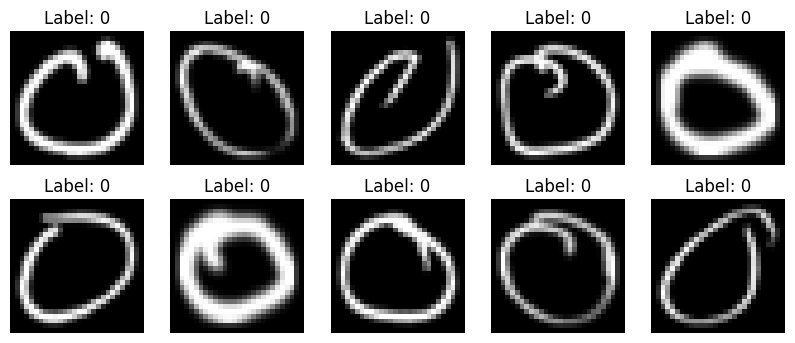

In [ ]:
# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1) 
x_test = x_test.reshape(-1, img_height, img_width, 1)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")
# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
  plt.subplot(2, 5, i + 1)
  plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
  plt.title(f"Label: {np.argmax(y_train[i])}")
  plt.axis("off")
plt.show()

# Task 2: Build the FCN Model

Model Architecture

• Create a Sequential model using Keras.

• Add 3 hidden layers with the following number of neurons:

– 1st hidden layer: 64 neurons

– 2nd hidden layer: 128 neurons

– 3rd hidden layer: 256 neurons

• Use sigmoid activation functions for all hidden layers.

• Add an output layer with 10 units with softmax (since Devnagari digits have 10 classes) and a softmax activation function.

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(64, activation='sigmoid'),  # 1st hidden layer
    Dense(128, activation='sigmoid'),  # 2nd hidden layer
    Dense(256, activation='sigmoid'),  # 3rd hidden layer
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

# Task 3: Compile the Model

Model Compilation

• Choose an appropriate optimizer (e.g., Adam), loss function (e.g., sparse categorical crossentropy),
and evaluation metric (e.g., accuracy).

In [17]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Task 4: Train the Model

Model Training

• Use the model.fit() function to train the model. Set the batch size to 128 and the number of
epochs to 20.

• Use validation split (validation split=0.2) to monitor the model’s performance on validation
data.

• Optionally, use callbacks such as ModelCheckpoint and EarlyStopping for saving the best model
and avoiding overfitting.

In [18]:
batch_size = 128
epochs = 20

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.3072 - loss: 2.0314 - val_accuracy: 0.0000e+00 - val_loss: 7.0061
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7857 - loss: 0.7149 - val_accuracy: 0.0000e+00 - val_loss: 7.8106
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8736 - loss: 0.3474 - val_accuracy: 0.0000e+00 - val_loss: 8.0017
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9274 - loss: 0.2412 - val_accuracy: 0.0000e+00 - val_loss: 7.9021
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9491 - loss: 0.1767 - val_accuracy: 0.0000e+00 - val_loss: 7.6305
Epoch 6/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9623 - loss: 0.1363 - val_accuracy: 0.0000e+00 - val_loss: 7.6928
Epoch 7/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9694 - loss: 0.1096 - val_accuracy: 0.0000e+00 - val_loss: 7.5566
Epoch 8/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9732 - lo

# Task 5: Evaluate the Model

Model Evaluation

• After training, evaluate the model using model.evaluate() on the test set to check the test
accuracy and loss.

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

95/95 - 0s - 2ms/step - accuracy: 0.7851 - loss: 1.6149
Test accuracy: 0.7851


# Task 6: Save and Load the Model

Model Saving and Loading

• Save the trained model to an .h5 file using model.save().

• Load the saved model and re-evaluate its performance on the test set.



In [22]:
model.save('devnagari_fcn.h5')

loaded_model = tf.keras.models.load_model('devnagari_fcn.h5')
loaded_model.evaluate(x_test, y_test)


95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9593 - loss: 0.2220


[1.6149228811264038, 0.7851485013961792]

# Task 7: Predictions

Making Predictions

• Use model.predict() to make predictions on test images.

• Convert the model’s predicted probabilities to digit labels using np.argmax().


In [23]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

#displaying first 10 predictions
for i in range(10):
    print(f"Predicted: {predicted_labels[i]}, Actual: {np.argmax(y_test[i])}")


95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0


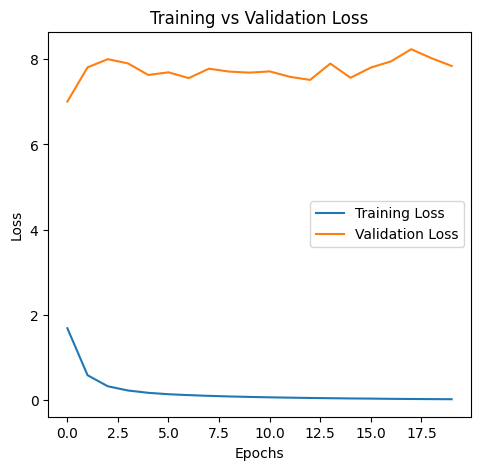

In [25]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()